# Recurrent Neural Networks

calcular o preço das ações do google

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 4:5].replace(",", "", regex=True).values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.23757287],
        [0.24151427],
        [0.22878051],
        ...,
        [0.21546794],
        [0.21229828],
        [0.22430164]],

       [[0.24151427],
        [0.22878051],
        [0.21641884],
        ...,
        [0.21229828],
        [0.22430164],
        [0.21420007]],

       [[0.22878051],
        [0.21641884],
        [0.1785483 ],
        ...,
        [0.22430164],
        [0.21420007],
        [0.20434657]],

       ...,

       [[0.38774582],
        [0.39307912],
        [0.39313424],
        ...,
        [0.41351653],
        [0.41165608],
        [0.41391618]],

       [[0.39307912],
        [0.39313424],
        [0.39367171],
        ...,
        [0.41165608],
        [0.41391618],
        [0.40495845]],

       [[0.39313424],
        [0.39367171],
        [0.39121867],
        ...,
        [0.41391618],
        [0.40495845],
        [0.40184391]]])

In [5]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Using TensorFlow backend.


In [6]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0282
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0109
Epoch 3/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0102
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0089
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0069
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0064
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0060
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0054
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0070
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0057
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0054
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

1198/1198 [==============================] - 7s 6ms/step - loss: 0.0021
Epoch 98/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0019
Epoch 99/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0018
Epoch 100/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0018


In [7]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 4:5].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

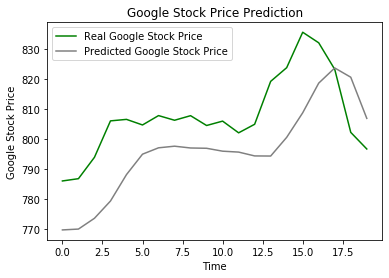

In [8]:
# Visualising the results
plt.plot(real_stock_price, color = 'green', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'gray', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## FIM